# Predicting Employee Attrition: A Data-driven Approach

# Introduction

# Methods and Results

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──


**Loading data from original source**

In [2]:
employee_url <- "https://raw.githubusercontent.com/Chadha-Bhavya/DSCI-100-Group-Project/main/HR_Analytics.csv.csv"
employee <- read_csv(employee_url)
employee |> head(5)

Rows: 1470 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Attrition, BusinessTravel, Department, EducationField, Gender, Job...
dbl (26): Age, DailyRate, DistanceFromHome, Education, EmployeeCount, Employ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2


**Table 1:Wrangled data**

In [3]:
# Selecting the necessary columns and mutating the name of the column
# using the R convention and mutating the Attrition column to a factor

# Dropping Na Values

employee <- employee |>
         select(Attrition, MonthlyIncome, Age) |>
         mutate(Attrition = as_factor(Attrition)) |>
         rename(Monthly_Income = MonthlyIncome) |>
         drop_na() 

employee |> head(5)

Attrition,Monthly_Income,Age
<fct>,<dbl>,<dbl>
Yes,5993,41
No,5130,49
Yes,2090,37
No,2909,33
No,3468,27


The table above shows the first 5 rows of the necessary columns from the original dataset. The columns it contains are "Attrition", "Monthly_Income", and "Age".

**Splitting data into Training and Testing data**

In [4]:
#Setting the seed for reproducibility 
set.seed(1000)

#Splitting data into 75% training data and 25% testing data
employee_split <- initial_split(employee, prop = 0.75, strata = Attrition)
employee_train <- training(employee_split)
employee_test <- testing(employee_split) 

**Examining number of rows in data set**

In [5]:
#Finding number of rows in the dataset
nrow(employee_train)

[1] 1101

**Table 2: Proportions of attrition in data set**

In [6]:
employee_proportions <- employee_train |>
                      group_by(Attrition) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(employee_train))
employee_proportions

Attrition,n,percent
<fct>,<int>,<dbl>
Yes,177,16.07629
No,924,83.92371


Table 2 shows that 16.08% of employees from the training set have left the company, and 83.92% of the employees from the training set are still working for the company. 

**Table 3: Mean monthly income and mean age with regard to attrition**

In [7]:
mean_statistics <- employee_train |>
              group_by(Attrition) |>
              summarize(mean_monthly_income = mean(Monthly_Income), mean_age = mean(Age))

mean_statistics

Attrition,mean_monthly_income,mean_age
<fct>,<dbl>,<dbl>
Yes,4546.571,33.27119
No,6891.736,37.79437


Table 3 shows a clear difference in mean age and in mean monthly income seperating employees 
who have left the company or not. Given the notable disparity in these figures between employees who have left the company or not, we can infer that training a classifier on monthly income and age 
can effectively predict whether an employee will leave the company or not. 

**Plot 1: Scatterplot showing Monthly Income vs Age**

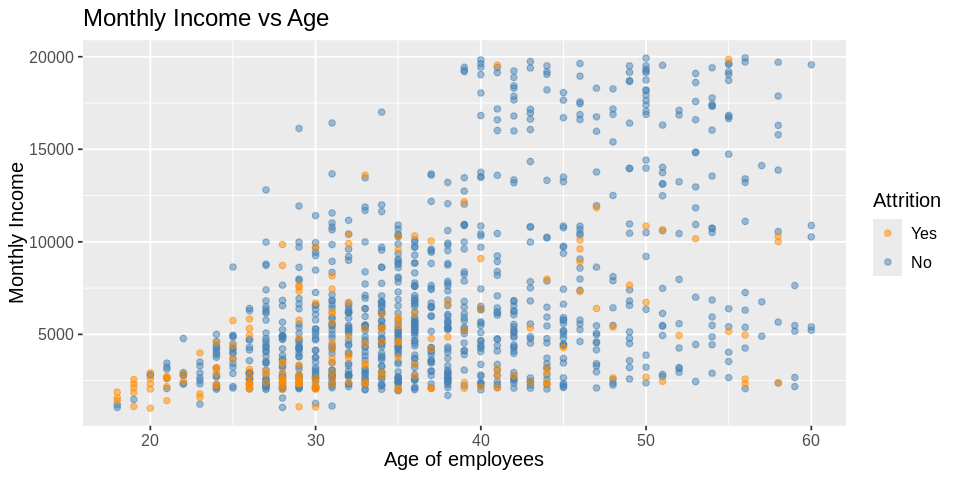

In [8]:
options(repr.plot.width = 8, repr.plot.height = 4)
age_vs_income_plot <- employee_train |>
  ggplot(aes(x = Age, y = Monthly_Income, color = Attrition)) +
  geom_point(alpha = 0.5) +
  labs(x = "Age of employees",
       y = "Monthly Income",
       color = "Attrition") +
  theme(text = element_text(size = 12)) +
scale_color_manual(values = c("darkorange", "steelblue"))+
ggtitle("Monthly Income vs Age")
age_vs_income_plot

Based on Plot 1 above, we can see that the majority of employees who left the company
(colored with orange) were younger and had lower monthly incomes than other employees. The employees
who stayed at the company (colored with blue) were mostly older and had a higher monthly income.
The differences in age and monthly income from employees who stayed at the company compared to 
employees who left shows that these categories will provide a good prediction for if an employee will
leave a company or not. 

**Code for analysis**

**Creating a recipe with the training data**

In [9]:
recipe_train <- recipe(Attrition ~ Age + Monthly_Income , data = employee_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

**Creating a classification model with tuning for K**

In [10]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

**Performing a 5-fold cross-validation on the training set**

In [11]:
vfold5 <- vfold_cv(employee_train, v = 5, strata = Attrition)

**Creating a workflow analysis from k=2 to k=50, skipping by 2, with the recipe and model 
specification. Collecting the metrics from the workflow analysis and filtering for accuracy.**

In [12]:
k_values<-tibble(neighbors=seq(from=2, to=50, by=2))

knn_metrics <- workflow() |>
       add_recipe(recipe_train) |>
       add_model(knn_spec) |>
       tune_grid(resamples = vfold5, grid= k_values)|>
       collect_metrics()

accuracy <- knn_metrics |>
  filter(.metric == "accuracy")

**Plot 2: Accuracy Estimate vs K values**

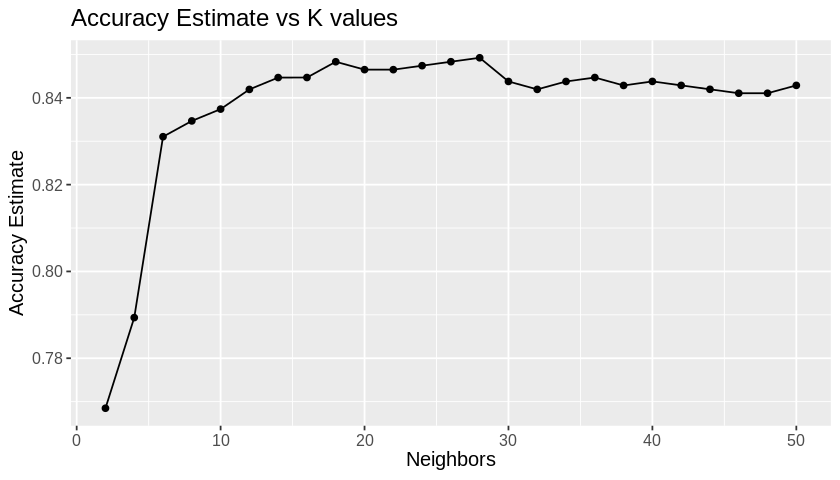

In [13]:
options(repr.plot.width = 7, repr.plot.height = 4)
accuracy_k_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))+
ggtitle("Accuracy Estimate vs K values")
accuracy_k_plot

In [14]:
best_k <- accuracy |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 28

From the plot of best K values and by sorting K values for highest accuracy as shown above, we can see that the optimal K value to use for the prediction is K=28 since it has the highest accuracy value. (Note: the plot above only shows K values evaluated from K=2 to 50. We also evaluated K values from k=2 to 100, but the accuracy values plateaued after approximately 50, and the code was taking too long to run with 100 K values, so we are only showing up to K=50 here.)


In [15]:
k_final <- 28

knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors = k_final) |>
            set_engine("kknn") |>
            set_mode("classification")

trial_fit <- workflow() |>
              add_recipe(recipe_train) |>
              add_model(knn_spec) |>
              fit(data = employee_train)

trial_predictions <- predict(trial_fit , employee_test) |>
      bind_cols(employee_test)

trial_prediction_accuracy <- trial_predictions |>
                            metrics(truth = Attrition, estimate = .pred_class) |>
                            filter(.metric == "accuracy")
trial_prediction_accuracy

confusion_matrix <- trial_predictions |>
             conf_mat(truth = Attrition, estimate = .pred_class)
confusion_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8211382


          Truth
Prediction Yes  No
       Yes   4  10
       No   56 299

**Plots 3 and 4: examining the difference between predicted attrition and actual attrition**

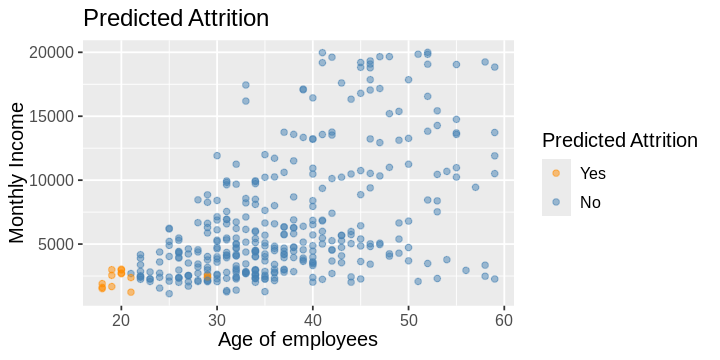

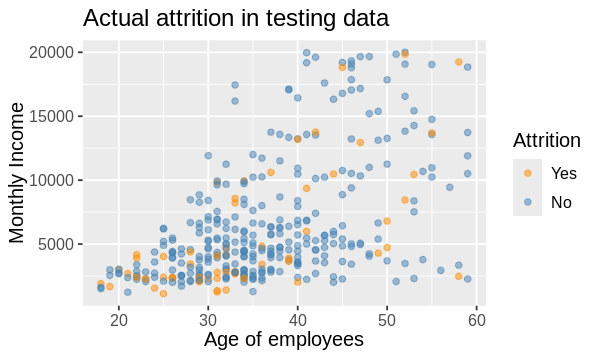

In [36]:
options(repr.plot.width = 6, repr.plot.height = 3)
pred_attrition_plot <- trial_predictions |>
  ggplot(aes(x = Age, y = Monthly_Income, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  labs(x = "Age of employees",
       y = "Monthly Income",
       color = "Predicted Attrition") +
  theme(text = element_text(size = 12)) +
scale_color_manual(values = c("darkorange", "steelblue"))+
ggtitle("Predicted Attrition")
pred_attrition_plot

options(repr.plot.width = 5, repr.plot.height = 3)
actual_attrition_plot <- employee_test |>
  ggplot(aes(x = Age, y = Monthly_Income, color = Attrition)) +
  geom_point(alpha = 0.5) +
  labs(x = "Age of employees",
       y = "Monthly Income",
       color = "Attrition") +
  theme(text = element_text(size = 12)) +
scale_color_manual(values = c("darkorange", "steelblue"))+
ggtitle("Actual attrition in testing data")
actual_attrition_plot

As shown in plots 3 and 4 above, our prediction falsely estimated that many of the younger employees with lower monthly incomes would leave their job. As well, our prediction did not correctly estimate many of the employees that were older with higher monthly incomes would leave the company. 

**Plot 5: Visualizing the Confusion Matrix**

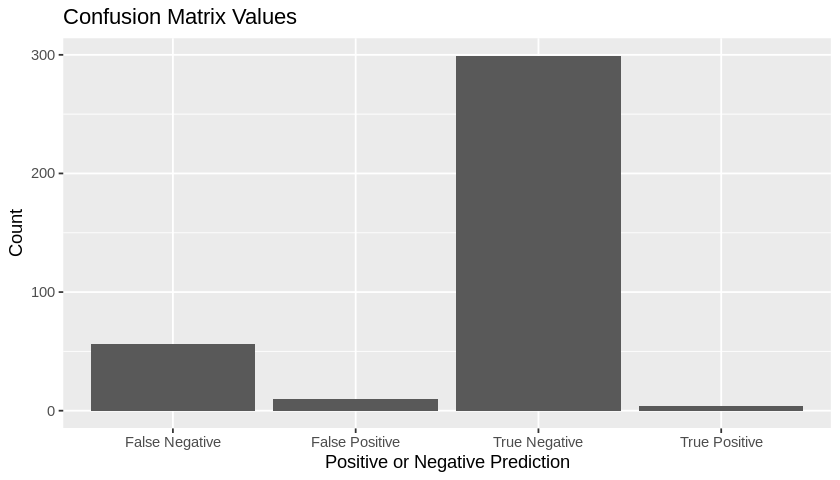

In [35]:
matrix_tibble<- tibble("True Positive"=4, "False Positive"=10, "False Negative"=56, "True Negative"=299)
wrangled_matrix<-pivot_longer(matrix_tibble, cols="True Positive":"True Negative", names_to="label",
values_to="number")
options(repr.plot.width = 7, repr.plot.height = 4)
matrix_hist<-ggplot(wrangled_matrix, aes(x = label, y= number)) +
  geom_bar(stat = "identity") +
labs(x= "Positive or Negative Prediction", y= "Count", title= "Confusion Matrix Values")
matrix_hist

As shown by the visualization of the confusion matrix above, our predictor was mostly able to correctly predict employees that would not leave the company. As shown by the low number of true positives, the predictor was not able to correctly predict many of the employees that did choose to leave the company. 

# Discussion